<a href="https://colab.research.google.com/github/CaioPassos3/LaboratorioCD/blob/main/Ap3LabCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

Link para o csv: https://dados.gov.br/dados/conjuntos-dados/mec-prouni

Usando o de 2020

In [5]:
df = pd.read_csv('/content/ProuniRelatorioDadosAbertos2020.csv', sep=';', encoding='latin1')

In [6]:
print(df.columns)

Index(['ANO_CONCESSAO_BOLSA', 'CODIGO_EMEC_IES_BOLSA', 'NOME_IES_BOLSA',
       'MUNICIPIO', 'CAMPUS', 'TIPO_BOLSA', 'MODALIDADE_ENSINO_BOLSA',
       'NOME_CURSO_BOLSA', 'NOME_TURNO_CURSO_BOLSA', 'CPF_BENEFICIARIO',
       'SEXO_BENEFICIARIO', 'RACA_BENEFICIARIO', 'DATA_NASCIMENTO',
       'BENEFICIARIO_DEFICIENTE_FISICO', 'REGIAO_BENEFICIARIO',
       'UF_BENEFICIARIO', 'MUNICIPIO_BENEFICIARIO'],
      dtype='object')


ANO_CONCESSAO_BOLSA: Ano em que a bolsa foi concedida.

CODIGO_EMEC_IES_BOLSA: Código da instituição de ensino superior (IES) no sistema e-MEC.

NOME_IES_BOLSA: Nome da instituição de ensino superior que concedeu a bolsa.

MUNICIPIO: Município onde está localizada a instituição de ensino.

CAMPUS: Nome do campus da instituição.

TIPO_BOLSA: Tipo da bolsa concedida (Integral ou Parcial).

MODALIDADE_ENSINO_BOLSA: Modalidade de ensino (Presencial ou a Distância - EaD).

NOME_CURSO_BOLSA: Nome do curso em que o beneficiário foi contemplado.

NOME_TURNO_CURSO_BOLSA: Turno do curso (Matutino, Vespertino, Noturno ou Integral).

CPF_BENEFICIARIO: CPF do beneficiário da bolsa (geralmente anonimizado ou com máscara de segurança em alguns datasets públicos).

SEXO_BENEFICIARIO: Sexo do beneficiário (Masculino ou Feminino).

RACA_BENEFICIARIO: Raça/cor do beneficiário, de acordo com as opções usadas no IBGE (Branca, Preta, Parda, Amarela, Indígena, ou Não Informado).

DATA_NASCIMENTO: Data de nascimento do beneficiário.

BENEFICIARIO_DEFICIENTE_FISICO: Indica se o beneficiário é pessoa com deficiência (Sim ou Não).

REGIAO_BENEFICIARIO: Região de residência do beneficiário (Norte, Nordeste, Sudeste, Sul, Centro-Oeste).

UF_BENEFICIARIO: Unidade Federativa (estado) de residência do beneficiário.

MUNICIPIO_BENEFICIARIO: Município de residência do beneficiário.

Distribuição de beneficiários por sexo

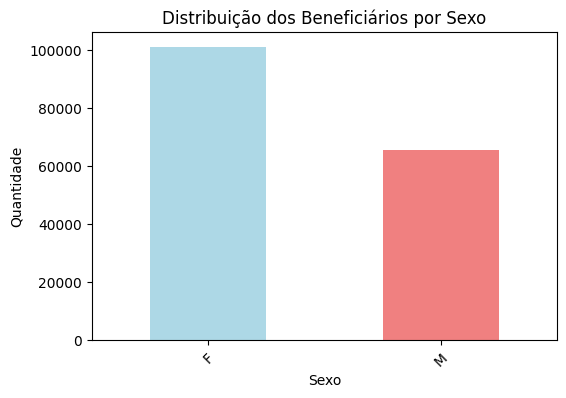

In [9]:
df['SEXO_BENEFICIARIO'] = df['SEXO_BENEFICIARIO'].fillna('Não Informado')
df['RACA_BENEFICIARIO'] = df['RACA_BENEFICIARIO'].fillna('Não Informado')

sexo_counts = df['SEXO_BENEFICIARIO'].value_counts()
plt.figure(figsize=(6, 4))
sexo_counts.plot(kind='bar', color=['lightblue', 'lightcoral', 'gray'])
plt.title('Distribuição dos Beneficiários por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

O gráfico mostra a quantidade de bolsas concedidas para cada sexo.

O gráfico mostra que no Prouni de 2020, tivemos uma participação muito maior de mulheres, com aproximadamente cem mil, enquanto os homens foram bem menos, com aproximadamente setenta mil.

Distribuição de beneficiários por raça

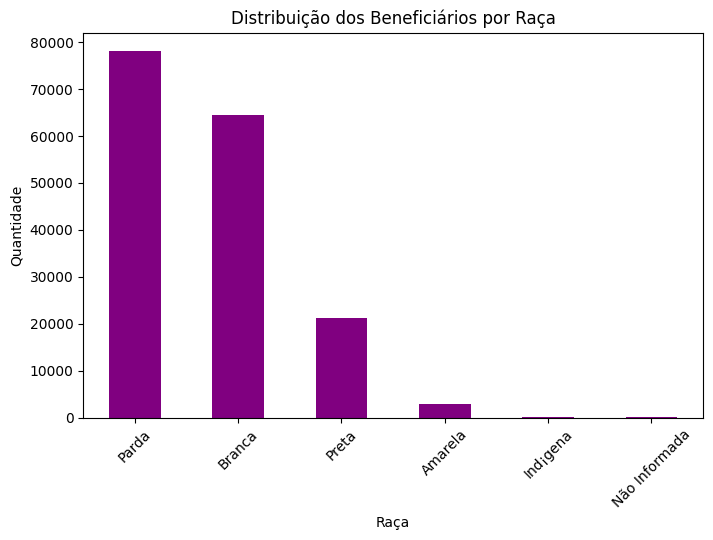

In [10]:
df['SEXO_BENEFICIARIO'] = df['SEXO_BENEFICIARIO'].fillna('Não Informado')
df['RACA_BENEFICIARIO'] = df['RACA_BENEFICIARIO'].fillna('Não Informado')

raca_counts = df['RACA_BENEFICIARIO'].value_counts()
plt.figure(figsize=(8, 5))
raca_counts.plot(kind='bar', color='purple')
plt.title('Distribuição dos Beneficiários por Raça')
plt.xlabel('Raça')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

O gráfico mostra a quantidade de bolsas concedidas para cada raça.

O gráfico demonstra que, no Prouni de 2020, quem mais recebeu bolsas foi a população declarada parda, com aproximadamente oitenta mil bolsas, seguida da população declarada branca, com cerca de sessenta mil bolsas.

Um fato a se destacar foi que a população declarada preta não recebeu nem metade da branca.

Já a declarada indígena recebeu tão pouca que no gráfico aparece aproximado a zero.

Distribuição de beneficiários por faixa etária

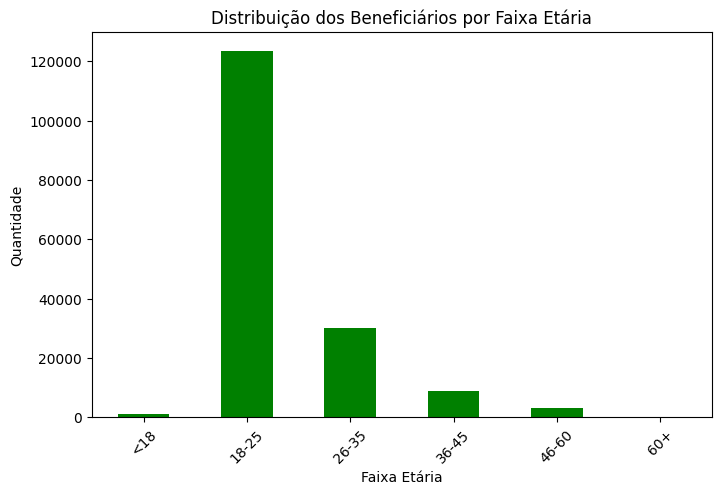

In [13]:
df['DATA_NASCIMENTO'] = pd.to_datetime(df['DATA_NASCIMENTO'], format='%d/%m/%Y', errors='coerce')

df['IDADE'] = 2020 - df['DATA_NASCIMENTO'].dt.year

bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-60', '60+']
df['FAIXA_ETARIA'] = pd.cut(df['IDADE'], bins=bins, labels=labels, right=False)

faixa_counts = df['FAIXA_ETARIA'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
faixa_counts.plot(kind='bar', color='green')
plt.title('Distribuição dos Beneficiários por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

O gráfico mostra a quantidade de bolsas concedidas para cada faixa etária.

O gráfico demonstra que no Prouni de 2020, a faixa etária com mais bolsas ficou entre 18 a 25 anos.

É interessante perceber que apesar de poucas, existem bolsas para menores de 18 anos.

A partir de 60 anos, não são vistas mais bolsas sendo concedidas.